In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# generate an arbitrary input distribution
def generate_data(samples=1000):
    mean = [0, 0]
    cov = [[3, 2], [2, 2]]
    data = np.random.multivariate_normal(mean, cov, samples)
    return data

In [5]:
# define a single linear neuron with Hebbian learning
class LinearNeuronHebbian:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim)
        self.learning_rate = learning_rate
        
    def train(self, data, epochs=1):
        for epoch in range(epochs):
            for x in data:
                x = x.reshape(-1)
                y = np.dot(self.weights, x)
                self.weights += self.learning_rate * y * x

    def get_weights(self):
        return self.weights

In [6]:
# generate input data
data = generate_data(samples=1000)

# initialize and train the neuron
input_dim = data.shape[1]
learning_rate = 0.01
neuron = LinearNeuronHebbian(input_dim=input_dim, learning_rate=learning_rate)

epochs = 10
neuron.train(data, epochs=epochs)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(data)
principal_component = pca.components_[0]

weights_normalized = neuron.get_weights() / np.linalg.norm(neuron.get_weights())
principal_component_normalized = principal_component / np.linalg.norm(principal_component)
print("Normalized Neuron Weights (Hebbian):", weights_normalized)
print("Normalized Principal Component (PCA):", principal_component_normalized)

Normalized Neuron Weights (Hebbian): [-0. -0.]
Normalized Principal Component (PCA): [0.77339506 0.63392435]


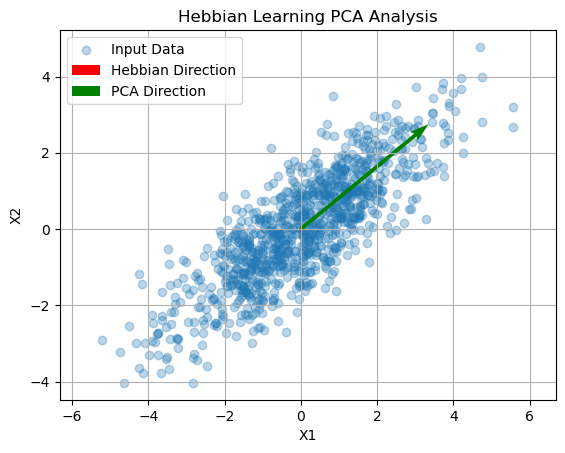

In [10]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Input Data")
plt.quiver(0, 0, weights_normalized[0], weights_normalized[1], color='r', scale=3,
label="Hebbian Direction")
plt.quiver(0, 0, principal_component_normalized[0],
principal_component_normalized[1], color='g', scale=3, label="PCA Direction")
plt.legend()
plt.title("Hebbian Learning PCA Analysis")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.axis('equal')
plt.show()